In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")

Data link: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

## Introduction

The provided dataset contains information regarding student stress factors. Specifically, it contains 20 of them, each of them measured scientifically with the proper scale. All of this information was obtained via surveys.

Our objective will be to reveal how each factor influences the student. Understanding its impact can be meaningful to identify key areas for interventions and psychological support. In order to do this, we will answer the questions provided by the dataset creator.

Before addresing such questions, one would rather do a brief examination of the dataset. 

## Brief examination

In [2]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
df.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [4]:
df.index

RangeIndex(start=0, stop=1100, step=1)

So, all columns are the same dtype, and it is numerical! Also, the index represents the number of each student, so we also know there are 1100 students.

20 columns are way too much to use the describe method. Let's use a boxplots in each column to see it visually.

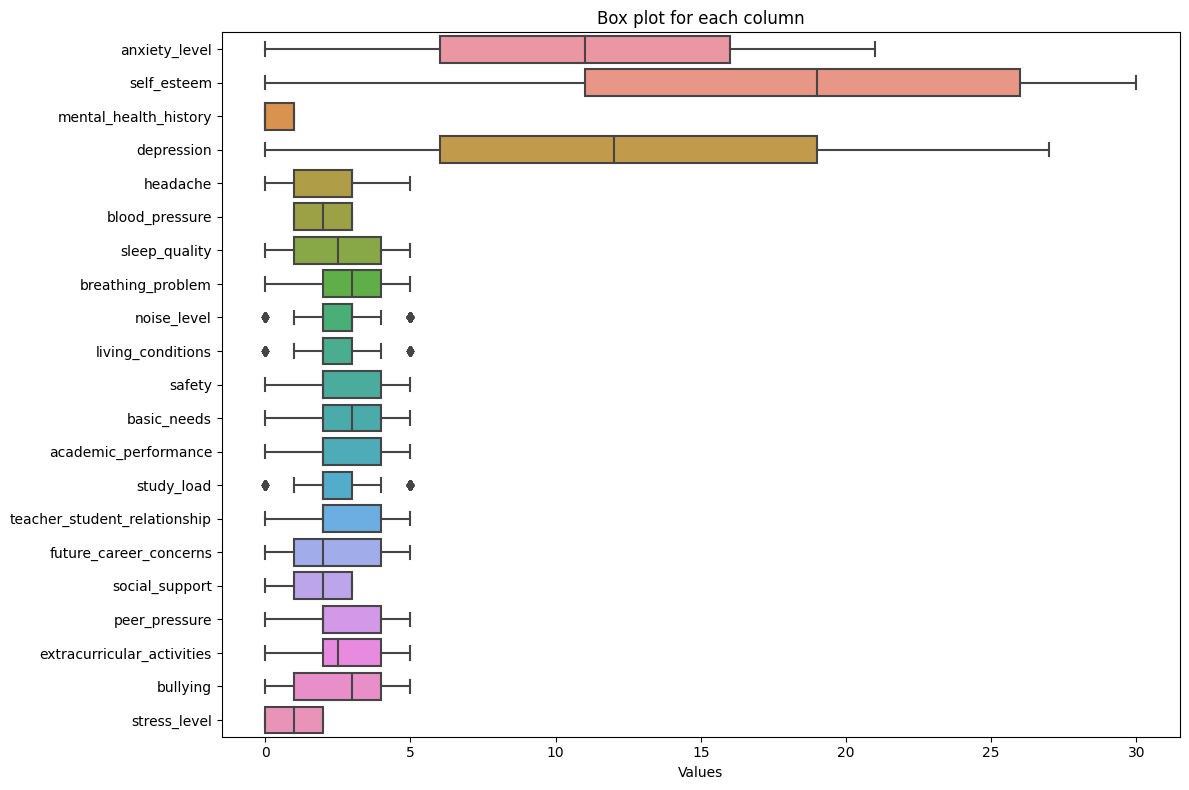

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

So not all values are measured equally. Some of these scales:

* Boolean values.


In [6]:
df['mental_health_history'].describe()

count    1100.000000
mean        0.492727
std         0.500175
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: mental_health_history, dtype: float64

Where 0 represents "No", 1 "Yes".

Also, some columns have their own scale, and it does not match with any other column.

In [7]:
df[['anxiety_level','self_esteem','depression']].describe()

,anxiety_level,self_esteem,depression
count,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,12.555455
std,6.117558,8.944599,7.727008
min,0.000000,0.000000,0.000000
25%,6.000000,11.000000,6.000000
50%,11.000000,19.000000,12.000000
75%,16.000000,26.000000,19.000000
max,21.000000,30.000000,27.000000


* Anxiety level 0-21
* Self esteem 0-30
* Depression 0-27

In [8]:
df['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

* Stress level 0-2

In [9]:
df['blood_pressure'].value_counts()

blood_pressure
3    500
1    300
2    300
Name: count, dtype: int64

* Blood pressure 1-3

The brief examination is finished. Now, onto the questions.

## Descriptive Statistics
* **1) How many students are in the dataset?**

As noted earlier with the df.index line, there are 1000 students.

* **2) What is the average anxiety level of students in the dataset?**

In [10]:
df['anxiety_level'].describe()

count    1100.000000
mean       11.063636
std         6.117558
min         0.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000
Name: anxiety_level, dtype: float64

The average anxiety level is 11.06. It is measured from 0 to 21, so it is higher than the scale's mean.

* **3) How many students have reported a history of mental health issues?**

In [11]:
mental_health_count = df['mental_health_history'].value_counts()
mental_health_count

mental_health_history
0    558
1    542
Name: count, dtype: int64

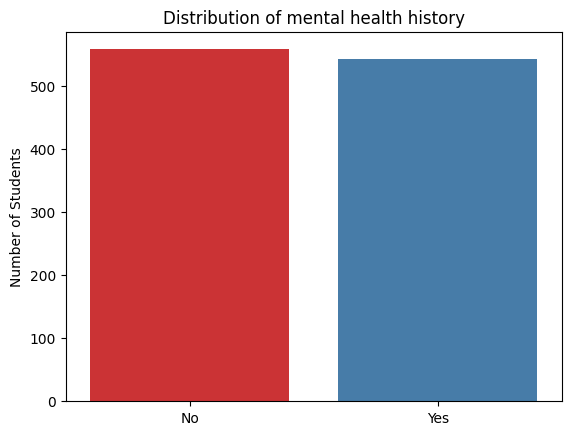

In [12]:
plt.figure()
sns.barplot(x=mental_health_count.index.map({0: 'No', 1: 'Yes'}), y = mental_health_count.values, palette = 'Set1')
plt.title('Distribution of mental health history')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

542 students have reported a mental health issue. Slightly less than 50% of the population.

## Psychological  Factors

* **1) How many students have a self-esteem level below the average?**

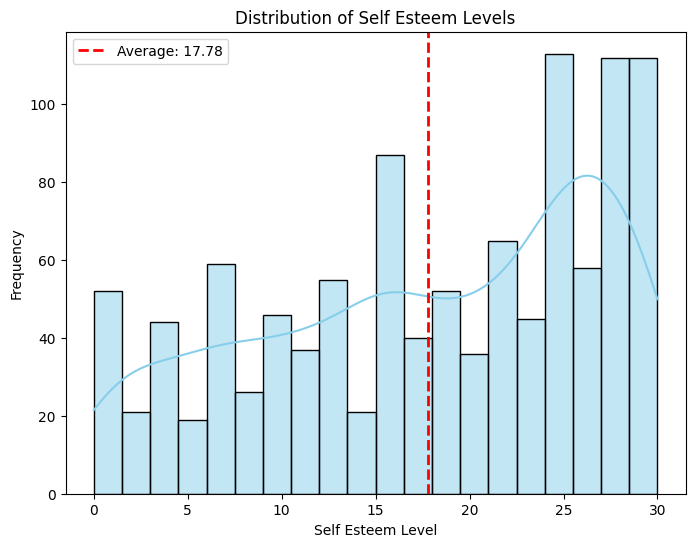

self_esteem
False    507
True     593
dtype: int64

In [13]:
# Visually:
plt.figure(figsize=(8, 6))
sns.histplot(df['self_esteem'], bins=20, kde=True, color='skyblue')
plt.axvline(df['self_esteem'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Average: {df["self_esteem"].mean():.2f}')
plt.title('Distribution of Self Esteem Levels')
plt.xlabel('Self Esteem Level')
plt.ylabel('Frequency')
plt.legend()

plt.show()

# Analytically: 
df.groupby(df['self_esteem'] >= df['self_esteem'].mean()).size()

507 students have lower self-esteem below average.

* **2) What percentage of students have reported experiencing depression?**

Depression levels on this dataset were measured using the *Patient Health Questionnaire (PHQ-9)*. The interpretation of total score provided by this test is:

| Total Score | Depression Severity            |
| ----------- | ------------------------------ |
| 1-4         | Minimal depression            |
| 5-9         | Mild depression               |
| 10-14       | Moderate depression           |
| 15-19       | Moderately severe depression  |
| 20-27       | Severe depression             |

Without expertise on this subject, this analysis will consider above "Moderate depression" as "experiencing depression" as, otherwise, the percentage of students who have reported depression would be almost a 100%.

Selecting those values where depression is higher than 10 and dividing by the total length will deliver the answer to this question.

In [14]:
((df['depression'] > 10).sum() / len(df)) * 100

56.36363636363636

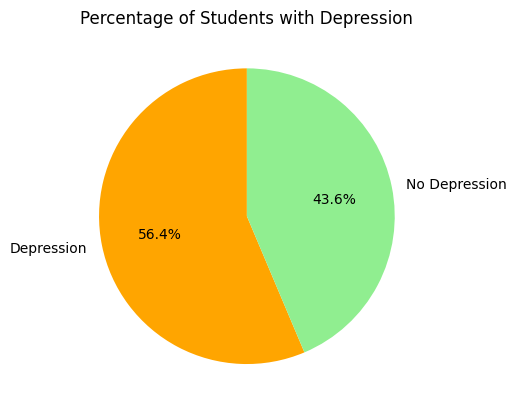

In [15]:
plt.figure()
plt.pie([(df['depression'] > 10).mean() * 100, (1 - (df['depression'] > 10).mean()) * 100],
        labels=['Depression', 'No Depression'],
        colors=['orange', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Percentage of Students with Depression')
plt.show()

According to our own measurement of the definition "experiencing depression", 56.4% students have reported it.

A new question appears. Are depression and self esteem related at all?

In [16]:
df['self_esteem'].corr(df['depression'])

-0.6996017571411519

Indeed. The lower self esteem, the higher depression values.

## Physiological Factors

* **1) How many students experience headaches frequently?**

In [17]:
df['headache'].describe()

count    1100.000000
mean        2.508182
std         1.409356
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: headache, dtype: float64

'headache' column is measured from 0 and up to 5. So if the value is bigger or equal than 3, it is considered frequently.

In [18]:
df.groupby(df['headache'] >= 3).size()

headache
False    544
True     556
dtype: int64

556 students experience headaches frequently.

* **2) What is the average blood pressure reading among the students?**

In [19]:
df['blood_pressure'].value_counts()

blood_pressure
3    500
1    300
2    300
Name: count, dtype: int64

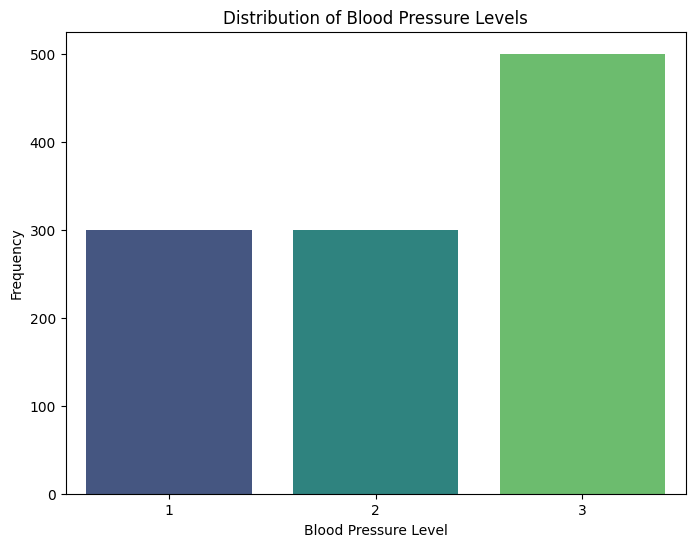

Average blood pressure is 2.1818181818181817


In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='blood_pressure', data=df, palette='viridis')
plt.title('Distribution of Blood Pressure Levels')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.show()
print(f"Average blood pressure is {df['blood_pressure'].mean()}")

* **3) How many students rate their sleep quality as poor?**

In [21]:
df['sleep_quality'].value_counts()

sleep_quality
1    328
5    192
2    188
4    188
3    170
0     34
Name: count, dtype: int64

Numbers equal or lower than 2 will be considered 'poor' for this question.

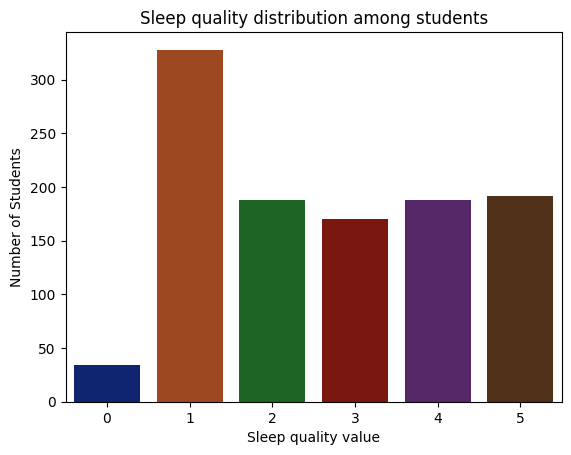

In [22]:
plt.figure()
sns.countplot(x='sleep_quality', data=df, palette='dark')
plt.title('Sleep quality distribution among students')
plt.ylabel('Number of Students')
plt.xlabel('Sleep quality value')
plt.show()

While most values are distributed equally, 1 is the most frequent value, and 0 is almost non existent.

In [23]:
print(f"Number of students who reported low quality sleep: {(df['sleep_quality'] <= 2).sum()}")

Number of students who reported low quality sleep: 550



## Enviromental Factors

* **1) How many students live in conditions with high noise levels?**

In [24]:
df['noise_level'].describe()

count    1100.000000
mean        2.649091
std         1.328127
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: noise_level, dtype: float64

4 and 5 will be considered "high" noise levels.

In [25]:
print(f"Number of students who reported high noise levels: {(df['noise_level']>=4).sum()}")

Number of students who reported high noise levels: 274


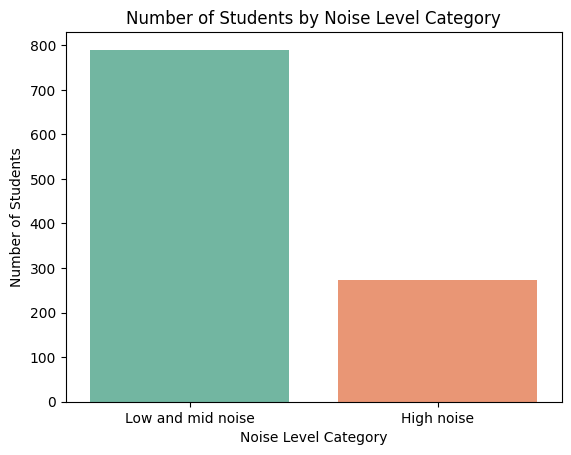

In [26]:
df_noise_level = df['noise_level']
df_noise_level = pd.cut(df_noise_level, bins = [0, 3, 5], labels = ['Low and mid noise', 'High noise'])
sns.barplot(x=df_noise_level.value_counts().index, y=df_noise_level.value_counts().values, palette = 'Set2')
plt.xlabel('Noise Level Category')
plt.ylabel('Number of Students')
plt.title('Number of Students by Noise Level Category')
plt.show()

**2) What percentage of students feel unsafe in their living conditions?**

In [27]:
df['safety'].describe()

count    1100.000000
mean        2.737273
std         1.406171
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: safety, dtype: float64

0 and 1 will be considered "unsafe". Same procedure as noise levels done earlier.

Number of students who feel unsafety: 217


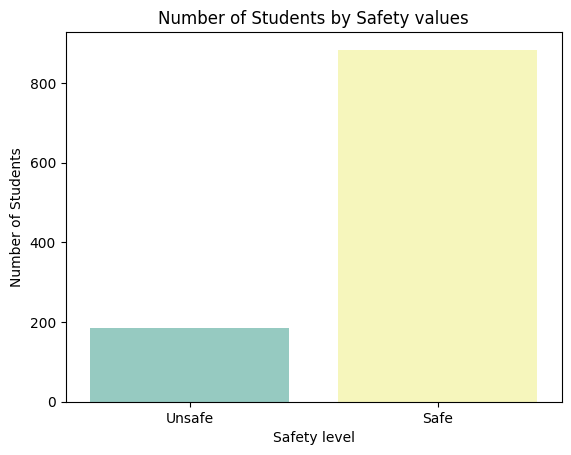

In [28]:
print(f"Number of students who feel unsafety: {(df['safety']<=1).sum()}")
df_safety = df['safety']
df_safety = pd.cut(df_safety, bins = [0, 1, 5], labels = ['Unsafe', 'Safe'])
sns.barplot(x=df_safety.value_counts().index, y=df_safety.value_counts().values, palette = 'Set3')
plt.xlabel('Safety level')
plt.ylabel('Number of Students')
plt.title('Number of Students by Safety values')
plt.show()

In [29]:
safety_percentage = ((df['safety'] < 2).sum() / len(df)) * 100
print(f"Number of students who feel  unsafe: {safety_percentage}")

Number of students who feel  unsafe: 19.727272727272727


* **3) How many students have reported not having their basic needs met?**

In [30]:
print(f"Number of students with basic needs not met: {(df['basic_needs']<2).sum()}")

Number of students with basic needs not met: 213


## Enviromental Factors

**1) How many students rate their academic performance as below average?**

**2) What is the average study load reported by students?**

**3) How many students have concerns about their future careers?**
**



In [31]:
# 1
print(f"Number of students with academic performance below average: {(df['academic_performance'] <= df['academic_performance'].mean()).sum()}")

#2 
print (f"Study load average: {df['study_load'].mean()}")

#3
print (f"Students who have concerns about their future careers: {(df['future_career_concerns'] > 3).sum()}")

Number of students with academic performance below average: 561
Study load average: 2.6218181818181816
Students who have concerns about their future careers: 371


## Social Factors

**1) How many students feel they have strong social support?**

**2) What percentage of students have experienced bullying?**

**3) How many students participate in extracurricular activities?**

In [32]:
#1. This variable only takes values from 0 to 3. So "strong social support" will mean 3.
print (f"Students who feel a strong social support: {(df['social_support']>2).sum()}")

#2 
bullying_percentage = ((df['bullying'] > 3).sum() / len(df)) * 100
print(f"Number of students who suffered bullying: {bullying_percentage}")

#3 
print (f"Students participating in extracurricular activities: {(df['extracurricular_activities']>2).sum()}")

Students who feel a strong social support: 458
Number of students who suffered bullying: 32.72727272727273
Students participating in extracurricular activities: 550


## Comparative analysis

**1) Is there a correlation between anxiety level and academic performance?**



In [33]:
df['anxiety_level'].corr(df['academic_performance'])

-0.6496011296145091

Students with low anxiety levels perform better academically.

**2) Do students with poor sleep quality also report higher levels of depression?**

In [34]:
df['sleep_quality'].corr(df['depression'])

-0.6931609071393333

Yes. As the correlation is negative, lower sleep quality value means a higher depression value.

**3) Are students who experience bullying more likely to have a history of mental health issues?**

In [35]:
df['bullying'].corr(df['mental_health_history'])

0.6243657971517645

Yes. Those who suffer from bullying experience a higher volume of mental health issues.

## General Exploration 

**1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?**

To answer this question, new dataframes, divided by factors, need to be made. Creating these dataframes provides a great opportunity aswell to set the threshold for "negative experience". However, there exists a little challenge added to this. On some columns, higher values is positive (academic performance, safety, living conditions) while on others it is negative (anxiety level, depression, headache). 

Also, for later questions, df_categories will be created. This dataframe will divide features on each factor, on their original values.

In [36]:
factors = {
    'Psychological': ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    'Social': ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}

factors_binary_dataframes = {}

# List of variables where higher values means negative experience
reverse_logic_columns = ['anxiety_level', 'mental_health_history', 'depression', 'headache', 'breathing_problem', 'noise_level', 'future_career_concerns', 'peer_pressure', 'bullying']

for factor, columns in factors.items(): 
    factor_df = pd.DataFrame()
    for column in columns:
        min_value, max_value = np.min(df[column]), np.max(df[column])
        
        if column in reverse_logic_columns:
            factor_df[column] = (df[column] < (min_value + max_value) / 2.0).astype(int)
        else:
            factor_df[column] = (df[column] > (min_value + max_value) / 2.0).astype(int)

    factors_binary_dataframes[factor] = factor_df

Quick check everything is the way we intended:

In [37]:
(factors_binary_dataframes['Psychological'].sum())

anxiety_level            512
self_esteem              670
mental_health_history    558
depression               652
dtype: int64

Okay, so now all we need is the sum of each factor. While we are at it, let's show aswell each feature in each factor.

In [38]:
sum_of_negative_experiences = {}

for factor, binary_df in factors_binary_dataframes.items():
    feature_sum = binary_df.sum(axis=0)
    
    factor_sum = feature_sum.sum()
    
    sum_of_negative_experiences[factor] = {"Factor Total": factor_sum, "Feature Sums": feature_sum}

for factor, sums in sum_of_negative_experiences.items():
    print(f"Negative experiences for {factor}:\n")
    print(f"Factor Total: {sums['Factor Total']}")
    print("Feature Sums:")
    print(sums['Feature Sums'])
    print("\n")

Negative experiences for Psychological:

Factor Total: 2392
Feature Sums:
anxiety_level            512
self_esteem              670
mental_health_history    558
depression               652
dtype: int64


Negative experiences for Physiological:

Factor Total: 2141
Feature Sums:
headache             544
blood_pressure       500
sleep_quality        550
breathing_problem    547
dtype: int64


Negative experiences for Environmental:

Factor Total: 2173
Feature Sums:
noise_level          537
living_conditions    549
safety               535
basic_needs          552
dtype: int64


Negative experiences for Academic:

Factor Total: 2155
Feature Sums:
academic_performance            539
study_load                      545
teacher_student_relationship    515
future_career_concerns          556
dtype: int64


Negative experiences for Social:

Factor Total: 2264
Feature Sums:
social_support                600
peer_pressure                 573
extracurricular_activities    550
bullying            

Now, a brief code to find the factor with most negative experiences, and also individual feature.

In [39]:
max_factor = max(sum_of_negative_experiences, key=lambda x: sum_of_negative_experiences[x]["Factor Total"])
max_factor_total = sum_of_negative_experiences[max_factor]["Factor Total"]
print(f"\nFactor with most negative experiences: {max_factor} (Total Count: {max_factor_total})")

max_feature_factor = max(sum_of_negative_experiences, key=lambda x: sum_of_negative_experiences[x]["Feature Sums"].idxmax())
max_feature = sum_of_negative_experiences[max_feature_factor]["Feature Sums"].idxmax()
max_feature_count = sum_of_negative_experiences[max_feature_factor]["Feature Sums"][max_feature]
print(f"\nFeature with most negative experiences: {max_feature} in factor {max_feature_factor} (Count: {max_feature_count})")


Factor with most negative experiences: Psychological (Total Count: 2392)

Feature with most negative experiences: social_support in factor Social (Count: 600)


So psychological and social support have the bigger number on negative experiences on their respective classifications.

**2) Are there any noticeable trends or patterns when comparing different factors?**

**3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?**

To answer these two questions, we will use scikit and correlation, using the anxiety_level column as main variable. 

In [40]:
psychological_df = df[factors['Psychological']].copy()
psychological_df.drop(columns=['anxiety_level'],inplace = True)
physiological_df = df[factors['Physiological']]
environmental_df = df[factors['Environmental']]
academic_df = df[factors['Academic']]
social_df = df[factors['Social']]

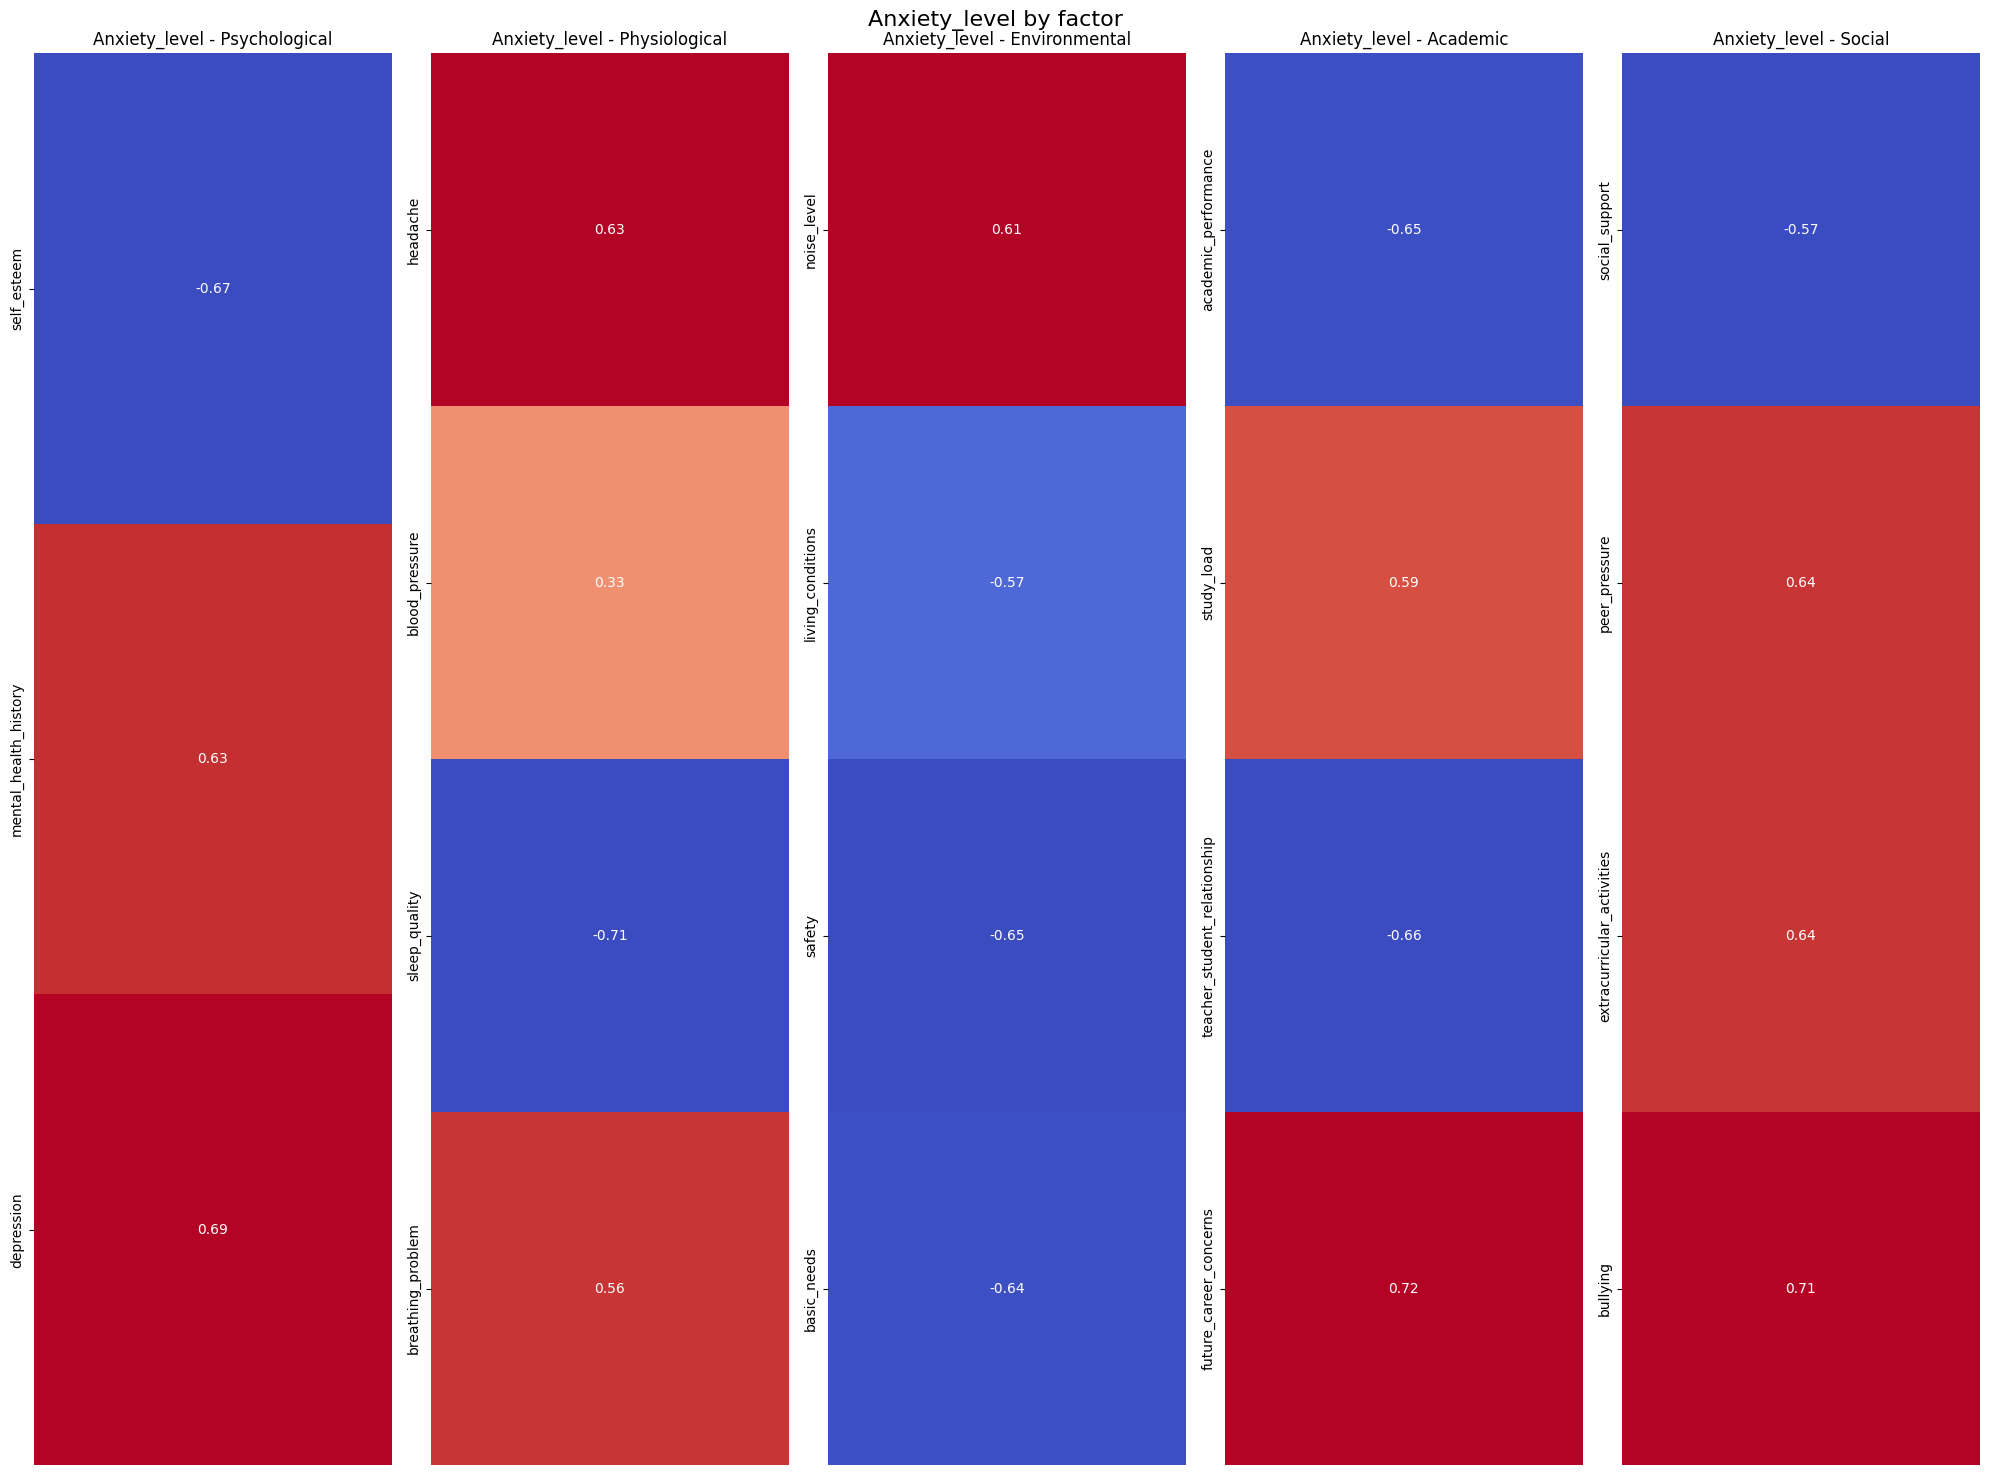

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(20, 15))

psychological_corr = psychological_df.corrwith(df['anxiety_level'])
sns.heatmap(psychological_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[0])
axes[0].set_title('Anxiety_level - Psychological')
axes[0].set_xticks([]) 

physiological_corr = physiological_df.corrwith(df['anxiety_level'])
sns.heatmap(physiological_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[1])
axes[1].set_title('Anxiety_level - Physiological')
axes[1].set_xticks([]) 

environmental_corr = environmental_df.corrwith(df['anxiety_level'])
sns.heatmap(environmental_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[2])
axes[2].set_title('Anxiety_level - Environmental')
axes[2].set_xticks([]) 

academic_corr = academic_df.corrwith(df['anxiety_level'])
sns.heatmap(academic_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[3])
axes[3].set_title('Anxiety_level - Academic')
axes[3].set_xticks([]) 

social_corr = social_df.corrwith(df['anxiety_level'])
sns.heatmap(social_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axes[4])
axes[4].set_title('Anxiety_level - Social')
axes[4].set_xticks([]) 

fig.suptitle('Anxiety_level by factor', fontsize = 16)
plt.tight_layout()

plt.show()

On this graphs, correlation on each feature is broken down into factors. All values, except blood_pressure, are relatively high, either positive or negative. Some comments:

* Psychological. As stated before, depression and self esteem values are highly correlated aswell.
* Enviromental. It is important to understand negative values do not have always a positive meaning. On these cases for example, lower living conditions, safety, and basic needs, translate on higher anxiety levels.
* Future career concerns and bullying are the higher (positive) values.

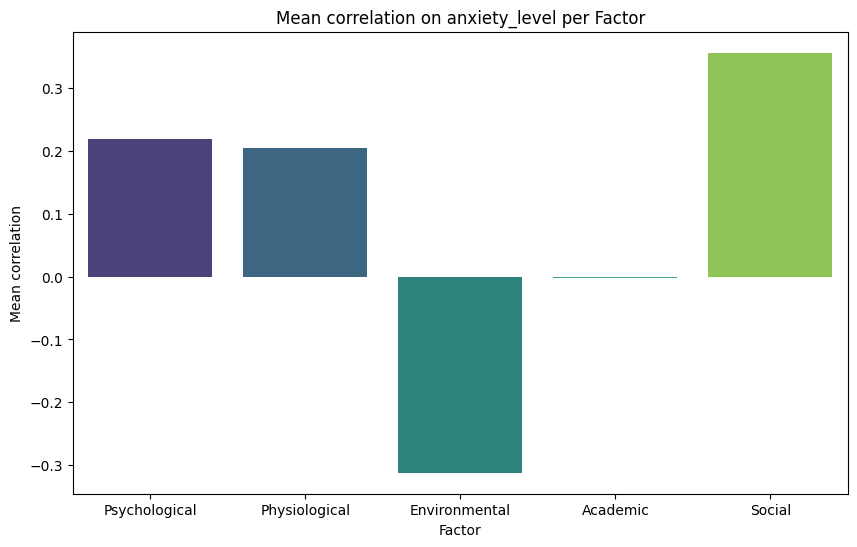

In [42]:
correlation_tables = {
    'Psychological': psychological_df.corrwith(df['anxiety_level']),
    'Physiological': physiological_df.corrwith(df['anxiety_level']),
    'Environmental': environmental_df.corrwith(df['anxiety_level']),
    'Academic': academic_df.corrwith(df['anxiety_level']),
    'Social': social_df.corrwith(df['anxiety_level'])
}

correlation_df = pd.DataFrame(correlation_tables)

mean_correlations = correlation_df.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_correlations.index, y=mean_correlations.values, palette='viridis')
plt.title('Mean correlation on anxiety_level per Factor')
plt.xlabel('Factor')
plt.ylabel('Mean correlation')
plt.show()

It is important to note Academic factor mean is 0 but it does not mean anyhow it is not important, only that it is heavily polarised and some features have high negative values while others do have high positive values.

To measure the impact of each factor and each facture, sklearn and .feature_importances method come handy. 

One model will measure each feature importance inside each factor, while other will ignore the factors and simply show overall importance.

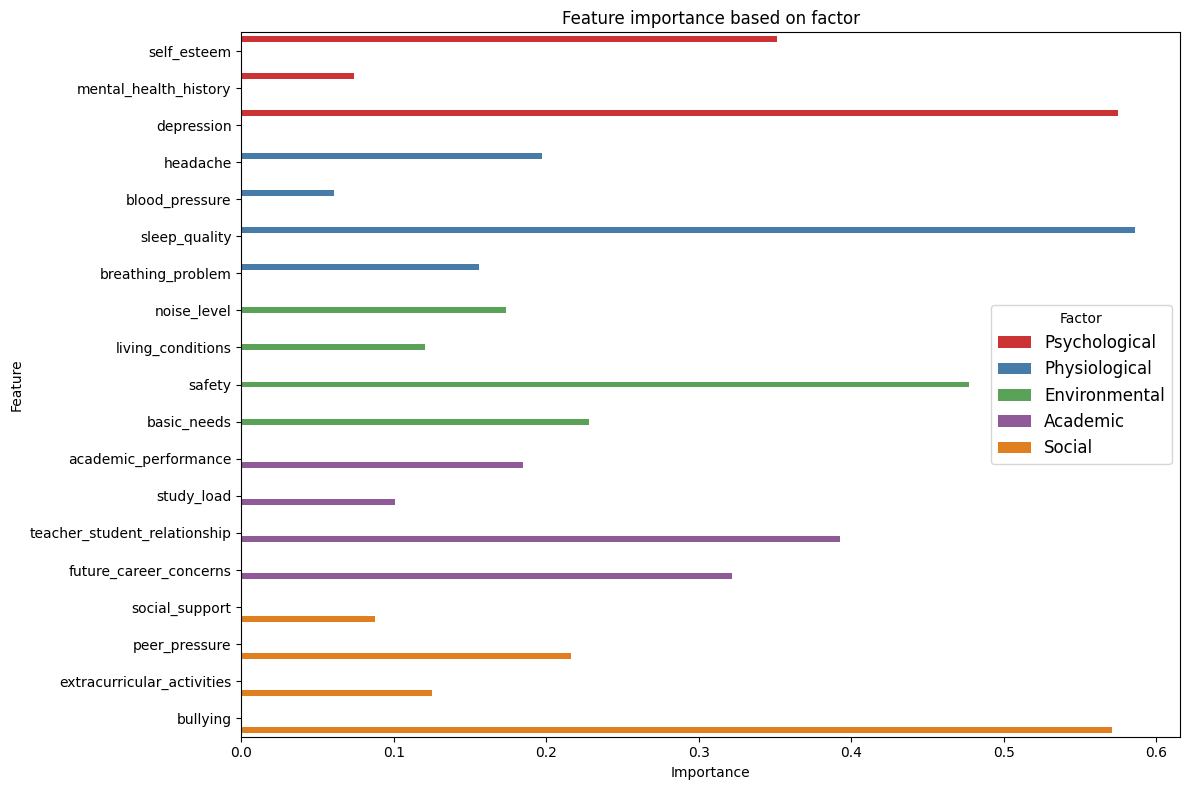

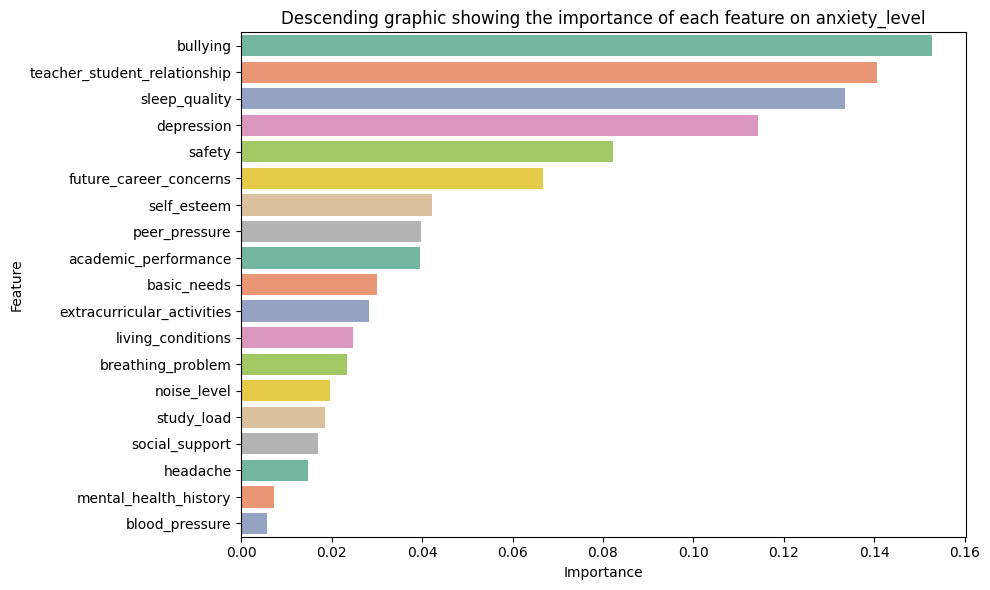

In [43]:
factors = {
    'Psychological': ['self_esteem', 'mental_health_history', 'depression'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    'Social': ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}

# factors is the same as before, with the exception of 'anxiety_level' deleted. 
from sklearn.ensemble import RandomForestRegressor

feature_importance_dict = {}
for factor, factor_features in factors.items():
    factor_df = df[factor_features]
    # model for each factor
    factor_model = RandomForestRegressor(random_state=1)
    factor_model.fit(factor_df, df['anxiety_level'])
    
    feature_importances = factor_model.feature_importances_
    
    feature_importance_dict[factor] = {'Feature': factor_features, 'Importance': feature_importances}

consolidated_importance_df = pd.concat({k: pd.DataFrame(v) for k, v in feature_importance_dict.items()})

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='level_0', data=consolidated_importance_df.reset_index(), palette='Set1')
plt.title('Feature importance based on factor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Factor', fontsize = 12)
plt.tight_layout()
plt.show()

features = [
    'self_esteem', 'mental_health_history', 'depression',
    'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
    'noise_level', 'living_conditions', 'safety', 'basic_needs',
    'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
    'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

stress_model = RandomForestRegressor(random_state=1)
stress_model.fit(df[features], df['anxiety_level'])
feature_importances = stress_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), palette='Set2')
plt.title('Descending graphic showing the importance of each feature on anxiety_level')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Predicting the anxiety level

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = df[features]
y = df['anxiety_level']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
stress_model = RandomForestRegressor(random_state = 1)
stress_model.fit(train_X, train_y)
val_predictions = stress_model.predict(val_X)
print (mean_absolute_error(val_y, val_predictions))


2.581309090909091


But regression and feature importance from blood_pressure was low, maybe ignoring that column will make the model perform better?

In [45]:
features_to_ignore = ['blood_pressure']

X = df.drop(features_to_ignore, axis=1)
y = df['anxiety_level']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
stress_model = RandomForestRegressor(random_state = 1)
stress_model.fit(train_X, train_y)
val_predictions = stress_model.predict(val_X)
print (mean_absolute_error(val_y, val_predictions))

0.0005454545454545339


It really did.

## Conclusions


On this analysis, all questions asked on the dataset card were answered, aswell as creating a model to predict the anxiety level. As seen on general exploration, correlations exhibit relatively high values, positive or negative, regarding anxiety levels. Therefore, working on improvements on each feature could be used as a mean to achieve improvements on the life of the students. Specifically, bullying and future carreer concerns, being easier to solve on the school side than, say, enviromental factors, should be looked into and dealt with.